In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use("plot_style.mplstyle")

In [2]:
def DC(split_ratio):
    s_matrix = np.array(
        [
            [np.sqrt(1-split_ratio), -1j*np.sqrt(split_ratio)], 
            [-1j*np.sqrt(split_ratio), np.sqrt(1-split_ratio)]
        ]
    )
    return s_matrix

def PS(angle1, angle2 = 0, loss_imbalance=0):
    s_matrix = np.array(
        [
            [np.exp(-1j*angle1), 0],
            [0, np.exp(-1j*angle2)*10**(-loss_imbalance/10)]
        ]
    )
    return s_matrix

def MZI(split_ratio, angle1, input_state = np.array([1,0]),loss_imbalance=0, dc_flipped=False):
    output = DC(split_ratio) @ PS(angle1=angle1, loss_imbalance=loss_imbalance) @ DC(split_ratio) @ input_state
    if dc_flipped:
        output = DC(1-split_ratio) @ PS(angle1=angle1, loss_imbalance=loss_imbalance) @ DC(split_ratio) @ input_state
    return output

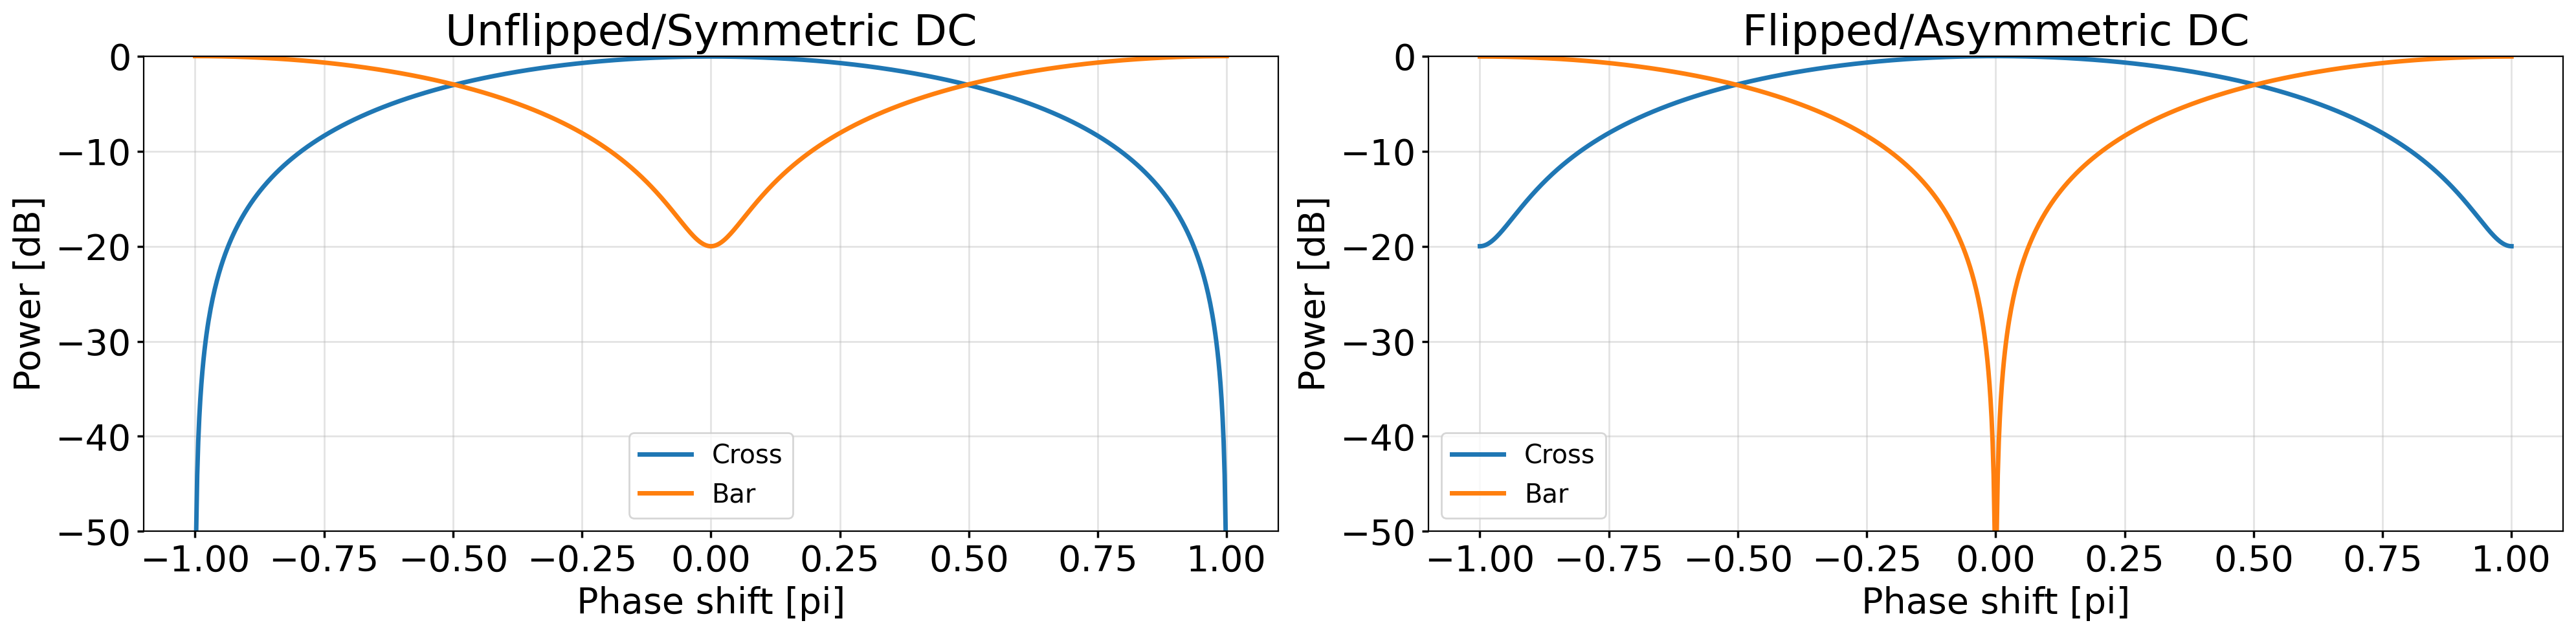

In [3]:
angle_range = np.linspace(-np.pi, np.pi, 1001)

MZI_5050_cross = []
MZI_5050_bar = []
for angle in angle_range:
    output = MZI(0.45, angle)
    MZI_5050_cross.append(np.abs(output[1])**2)
    MZI_5050_bar.append(np.abs(output[0])**2)
    
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(angle_range/np.pi, 10*np.log10(np.array(MZI_5050_cross)), label='Cross')
plt.plot(angle_range/np.pi, 10*np.log10(np.array(MZI_5050_bar)), label='Bar')
plt.xlabel('Phase shift [pi]')
plt.ylabel('Power [dB]')
plt.legend()
plt.ylim([-50, 0])
plt.grid(True)
plt.title("Unflipped/Symmetric DC")

MZI_5050_cross = []
MZI_5050_bar = []
for angle in angle_range:
    output = MZI(0.45, angle, dc_flipped=True)
    MZI_5050_cross.append(np.abs(output[1])**2)
    MZI_5050_bar.append(np.abs(output[0])**2)

plt.subplot(122)
plt.plot(angle_range/np.pi, 10*np.log10(np.array(MZI_5050_cross)), label='Cross')
plt.plot(angle_range/np.pi, 10*np.log10(np.array(MZI_5050_bar)), label='Bar')
plt.xlabel('Phase shift [pi]')
plt.ylabel('Power [dB]')
plt.legend()
plt.ylim([-50, 0])
plt.grid(True)
plt.title("Flipped/Asymmetric DC")

plt.tight_layout()

RIN p2p in dB: [-30.5490196 -25.5490196 -20.5490196 -15.5490196 -10.5490196  -5.5490196]


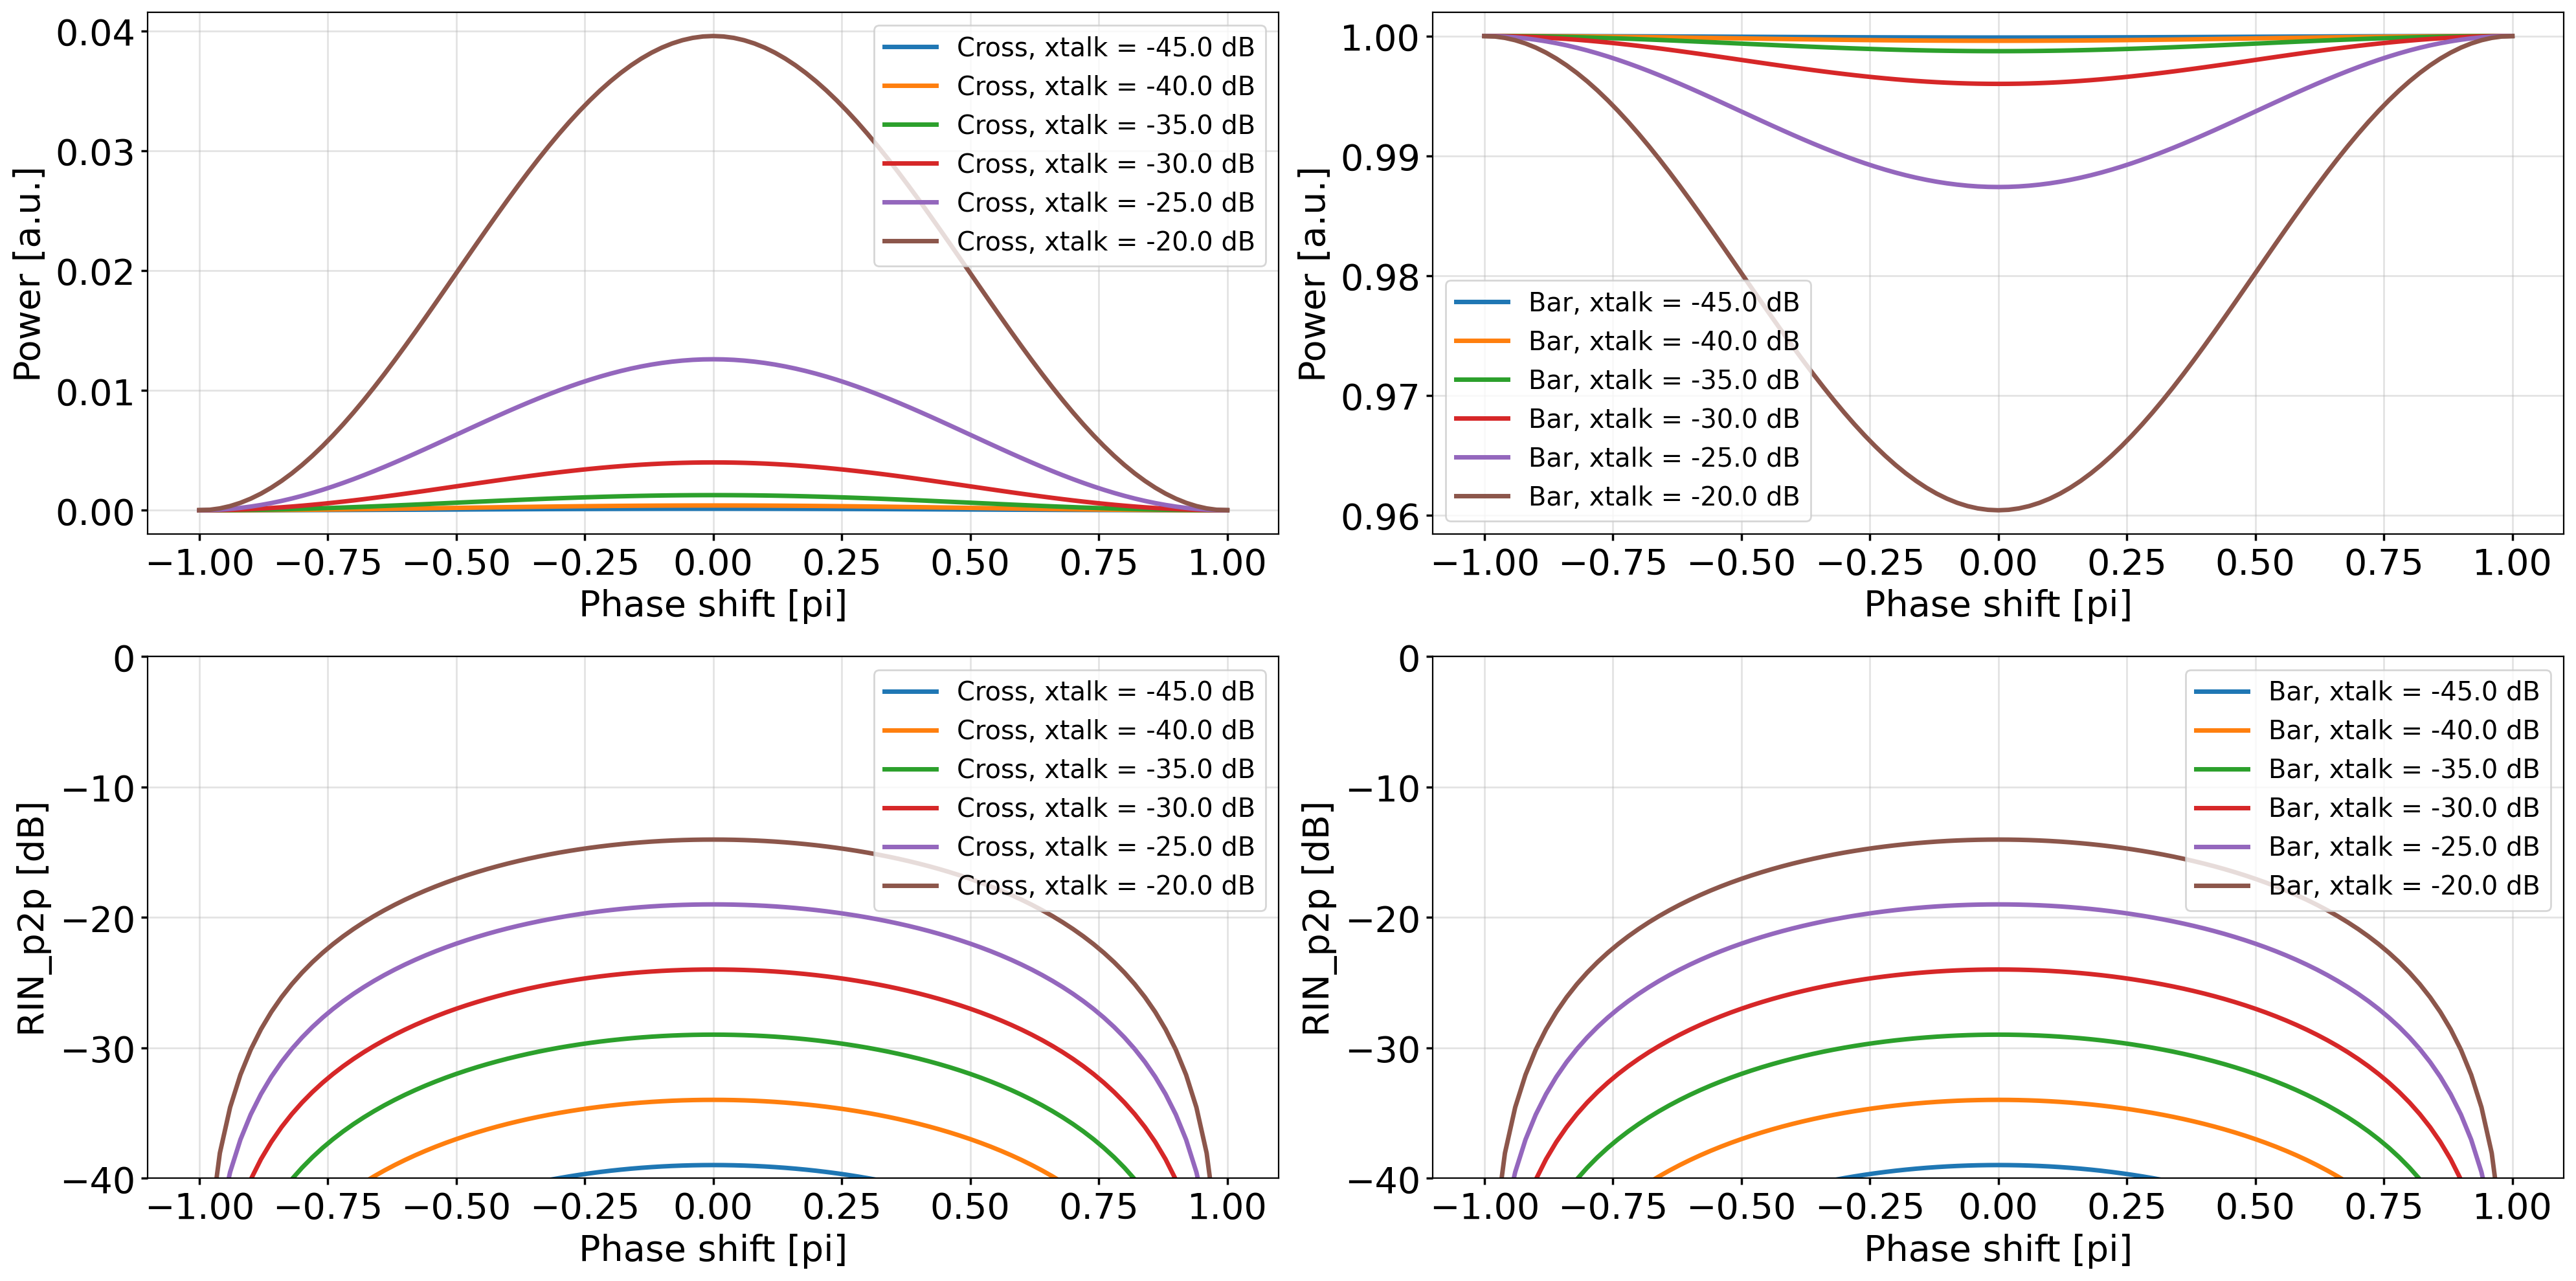

In [4]:
angle_range = np.linspace(-np.pi, np.pi, 101)

MZI_cross = []
MZI_bar = []

xtalk_range = np.linspace(-45, -20, 6)
split_ratio_xtalk = 10**(xtalk_range/10)

rin_p2p = xtalk_range + 6 + 10*np.log10(7)
print("RIN p2p in dB:", rin_p2p)

loss_imbalance = 0

for split_ratio in split_ratio_xtalk:
    for angle in angle_range:
        output = MZI(split_ratio, angle, loss_imbalance=loss_imbalance)
        MZI_cross.append(np.abs(output[1])**2)
        MZI_bar.append(np.abs(output[0])**2)
    
MZI_cross = np.array(MZI_cross).reshape(len(xtalk_range), len(angle_range))
MZI_bar = np.array(MZI_bar).reshape(len(xtalk_range), len(angle_range))

plt.figure(figsize=(20,10))
for i in range(len(xtalk_range)):
    plt.subplot(221)
    plt.plot(angle_range/np.pi, MZI_cross[i,:], label='Cross, xtalk = {} dB'.format(xtalk_range[i]))
    plt.xlabel('Phase shift [pi]')
    plt.ylabel('Power [a.u.]')
    plt.legend()
    plt.grid(True)
    plt.subplot(222)
    plt.plot(angle_range/np.pi, MZI_bar[i,:], label='Bar, xtalk = {} dB'.format(xtalk_range[i]))
    plt.xlabel('Phase shift [pi]')
    plt.ylabel('Power [a.u.]')
    plt.legend()
    plt.grid(True)
    plt.subplot(223)
    plt.plot(angle_range/np.pi, 10*np.log10(MZI_cross[i,:]), label='Cross, xtalk = {} dB'.format(xtalk_range[i]))
    plt.xlabel('Phase shift [pi]')
    plt.ylabel('RIN_p2p [dB]')
    plt.ylim([-40, 0])
    plt.grid(True)
    plt.legend()
    plt.subplot(224)
    plt.plot(angle_range/np.pi, 10*np.log10(1-MZI_bar[i,:]), label='Bar, xtalk = {} dB'.format(xtalk_range[i]))
    plt.xlabel('Phase shift [pi]')
    plt.ylabel('RIN_p2p [dB]')
    plt.ylim([-40, 0])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()